In [1]:
'''This code uses an ANN to predict outcomes of AFL matches in 2018 based on player data from 2012-2017.'''
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime

In [2]:
#afl = pd.read_csv('C:/path/to/your/csv/file.csv')

In [3]:
afl = pd.read_csv('C:/Users/the_n/OneDrive/Documents/Coding/stats.csv')

In [4]:
afl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63712 entries, 0 to 63711
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    63712 non-null  object 
 1   Player                  63712 non-null  object 
 2   D.O.B                   63712 non-null  object 
 3   Height                  63712 non-null  int64  
 4   Weight                  63712 non-null  int64  
 5   Position                63712 non-null  object 
 6   Season                  63712 non-null  int64  
 7   Round                   63712 non-null  object 
 8   Date                    63624 non-null  object 
 9   Score                   63624 non-null  float64
 10  Margin                  63624 non-null  float64
 11  WinLoss                 63624 non-null  object 
 12  Opposition              63624 non-null  object 
 13  Venue                   63624 non-null  object 
 14  Disposals               63712 non-null

In [5]:
afl = afl.dropna(axis=0)
afl = afl[afl['WinLoss'] != 'D']
afl['D.O.B'] = pd.to_datetime(afl['D.O.B'])
afl['Date'] = pd.to_datetime(afl['Date'])
age_in_days = (afl['Date']-afl['D.O.B'])
age_in_years = age_in_days.dt.days/365.2425
afl['Age'] = age_in_years

In [6]:
import random
grouped_data = afl.groupby(['Team','Season','Round','WinLoss','Opposition','Venue'])['Player'].apply(list).reset_index()
#print(grouped_data["Player"])
#grouped_data['Player'] = grouped_data['Player'].apply(np.random.shuffle)
#grouped_data = grouped_data.to_numpy()
players = grouped_data['Player'].to_numpy()

for item in players:
    random.shuffle(item)
    
grouped_data['Player'] = players
grouped_data = grouped_data.to_numpy()
#print(grouped_data)

In [7]:
grouped_data[0]

array(['Adelaide', 2012, 'PF', 'L', 'Hawthorn', 'M.C.G.',
       list(['Henderson, Ricky', 'Petrenko, Jared', 'Doughty, Michael', 'Reilly, Brent', 'Wright, Matthew', 'Vince, Bernie', 'Dangerfield, Patrick', 'Thompson, Luke', 'Thompson, Scott', 'Smith, Brodie', 'Jacobs, Sam', 'van Berlo, Nathan', 'Walker, Taylor', 'Sloane, Rory', 'Douglas, Richard', 'Callinan, Ian', 'Mackay, David', 'Tippett, Kurt', 'Porplyzia, Jason', 'Otten, Andy', 'Johncock, Graham', 'Rutten, Ben'])],
      dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct1 = ColumnTransformer([('encoder',OneHotEncoder(),[3,4,5])], remainder='passthrough',sparse_threshold=0)
grouped_data = ct1.fit_transform(grouped_data)

In [9]:
grouped_data[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 'Adelaide', 2012, 'PF',
       list(['Henderson, Ricky', 'Petrenko, Jared', 'Doughty, Michael', 'Reilly, Brent', 'Wright, Matthew', 'Vince, Bernie', 'Dangerfield, Patrick', 'Thompson, Luke', 'Thompson, Scott', 'Smith, Brodie', 'Jacobs, Sam', 'van Berlo, Nathan', 'Walker, Taylor', 'Sloane, Rory', 'Douglas, Richard', 'Callinan, Ian', 'Mackay, David', 'Tippett, Kurt', 'Porplyzia, Jason', 'Otten, Andy', 'Johncock, Graham', 'Rutten, Ben'])],
      dtype=object)

In [10]:
training = [x for x in grouped_data if x[43]<2018]
test = [x for x in grouped_data if x[43]==2018]

In [11]:
y_train = np.array([x[0] for x in training])
y_train = y_train.reshape(-1,1)
y_test = np.array([x[0] for x in test])
y_test = y_test.reshape(-1,1)

In [12]:
print(y_train)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


In [13]:
# player_stats is each players' average stats between 2012 and 2017.
player_stats = afl[afl['Season'] < 2018].groupby('Player',sort=False).mean()
player_stats = player_stats.reset_index()
player_stats = player_stats.drop(['Season','Score','Margin'],axis=1)
player_stats = player_stats.to_numpy()

# Player average stats for 2018
player_stats_2018 = afl[afl['Season'] == 2018].groupby('Player',sort=False).mean()
player_stats_2018 = player_stats_2018.reset_index()
player_stats_2018 = player_stats_2018.drop(['Season','Score','Margin'],axis=1)
player_stats_2018 = player_stats_2018.to_numpy()

In [14]:
player_stats[0]

array(['Atkins, Rory', 186.0, 85.0, 19.910714285714285,
       11.053571428571429, 4.357142857142857, 8.857142857142858,
       0.4642857142857143, 0.35714285714285715, 0.10714285714285714,
       1.8928571428571428, 1.8392857142857142, 3.482142857142857,
       1.8392857142857142, 2.607142857142857, 0.4107142857142857, 0.75,
       0.19642857142857142, 6.142857142857143, 13.982142857142858,
       0.30357142857142855, 0.3392857142857143, 1.2321428571428572,
       0.7678571428571429, 0.625, 78.32142857142857, 22.247987882805838],
      dtype=object)

In [15]:
len(player_stats)

1145

In [16]:
# Include opposition and venue in features
opp_teams_train = np.array([x[2:42] for x in training])
opp_teams_test = np.array([x[2:42] for x in test])

In [17]:
opp_teams_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0], dtype=object)

In [18]:
X_train = [0]*len(training)
for i in range(0,len(training)):
    player_list = []
    j = 0
    for j in range(0,len(player_stats)):
        if player_stats[j][0] in training[i][-1]:
            player_list.append(player_stats[j][1:])
    X_train[i] = player_list
    
X_train = [np.concatenate(x) for x in X_train]

In [19]:
print(len(X_train[0]))
X_train[0]

572


array([181.0, 79.0, 20.346774193548388, 12.725806451612904,
       3.4919354838709675, 7.620967741935484, 0.6693548387096774,
       0.5645161290322581, 0.06451612903225806, 3.870967741935484,
       1.314516129032258, 4.306451612903226, 3.661290322580645,
       2.4274193548387095, 1.0, 0.9435483870967742, 0.03225806451612903,
       8.435483870967742, 11.85483870967742, 0.22580645161290322,
       0.5161290322580645, 1.3951612903225807, 0.532258064516129,
       0.7661290322580645, 81.44354838709677, 27.993200275468777, 200.0,
       102.0, 14.18978102189781, 8.021897810218977, 3.7664233576642334,
       6.1678832116788325, 0.2846715328467153, 0.24817518248175183,
       33.91970802919708, 2.065693430656934, 1.0656934306569343,
       1.9562043795620438, 2.335766423357664, 1.8832116788321167,
       0.8905109489051095, 0.7956204379562044, 0.19708029197080293,
       6.189781021897811, 7.956204379562044, 0.9124087591240876,
       0.27007299270072993, 2.627737226277372, 0.021897810218

In [20]:
'''modified: player_stats_2018 -> player_stats to test performance'''
X_test = [0]*len(test)
for i in range(0,len(test)):
    player_list = []
    j = 0
    for j in range(0,len(player_stats_2018)):
        if player_stats_2018[j][0] in test[i][-1]:
            player_list.append(player_stats_2018[j][1:])
    X_test[i] = player_list
    
X_test = [np.concatenate(x) for x in X_test]

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [22]:
len(X_test)

408

In [23]:
scaled_X_train = np.hstack((scaled_X_train, opp_teams_train))
scaled_X_test = np.hstack((scaled_X_test, opp_teams_test))

In [24]:
scaled_X_train = np.asarray(scaled_X_train).astype(np.float32)
scaled_X_test = np.asarray(scaled_X_test).astype(np.float32)

In [25]:
print(scaled_X_train[0])

[-9.44964647e-01 -1.06107175e+00  6.18809342e-01  1.21086979e+00
 -6.62710309e-01  2.24780035e-03 -1.99093353e-02  2.76421607e-01
 -2.37170607e-01  5.80942214e-01 -1.59369335e-01  1.61617553e+00
  1.15693474e+00  4.88989621e-01  5.73852718e-01  5.92228711e-01
 -5.41615188e-01  8.38677347e-01  3.50265175e-01 -5.74591875e-01
 -1.45324454e-01 -3.24574262e-01  1.82839751e-01  1.12314725e+00
 -6.65854588e-02  1.48138237e+00  1.48642302e+00  1.49926674e+00
 -4.98186707e-01 -4.20792162e-01 -2.46276647e-01 -4.70008254e-01
 -6.96794450e-01 -6.69697583e-01  4.98701954e+00 -8.92397702e-01
 -3.31930578e-01 -4.39176649e-01  2.88001388e-01 -4.91637856e-01
  8.16050619e-02 -1.67277917e-01  1.65571541e-01 -1.78655699e-01
 -6.01860940e-01  8.02277267e-01 -6.12190485e-01  3.75586897e-01
 -9.59012747e-01 -3.23338598e-01  6.65037215e-01  6.78989708e-01
 -1.03061175e+00 -1.53985322e+00 -1.08733557e-01 -2.03033388e-01
 -1.09663534e+00  5.59475785e-03 -6.64329171e-01 -4.20438260e-01
 -2.77306497e-01  5.41319

In [35]:
# Build the ANN
ann = tf.keras.models.Sequential()
# First layer
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
# Second layer
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
# Output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [36]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
steps = []
accs = []
test_accs = []

for i in range(0, 25):
    ann.fit(scaled_X_train, y_train, epochs = 1)
    [loss, accuracy] = ann.evaluate(scaled_X_train, y_train)
    [loss_t, accuracy_t] = ann.evaluate(scaled_X_test, y_test)
    accs.append(accuracy), steps.append(i), test_accs.append(accuracy_t)

13/13 [==============================] - 0s 537us/step - loss: 0.8300 - accuracy: 0.5784


13/13 [==============================] - 0s 690us/step - loss: 0.9069 - accuracy: 0.5711


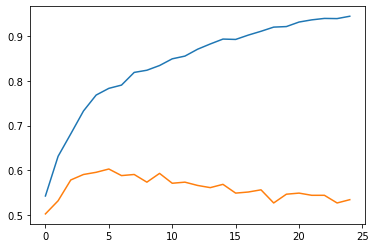

In [29]:
import matplotlib.pyplot as plt
plt.plot(steps, accs)
plt.plot(steps, test_accs)

In [30]:
y_pred = ann.predict(scaled_X_test)

In [31]:
y_pred

array([[0.850284  ],
       [0.02492696],
       [0.07189468],
       [0.07804167],
       [0.2935543 ],
       [0.13958934],
       [0.14376986],
       [0.24368817],
       [0.62740684],
       [0.05425075],
       [0.27551737],
       [0.76272595],
       [0.14329562],
       [0.31249043],
       [0.05942544],
       [0.01615885],
       [0.03868657],
       [0.30838048],
       [0.1976479 ],
       [0.03546044],
       [0.26803026],
       [0.01279387],
       [0.90836227],
       [0.98998845],
       [0.02410406],
       [0.37276852],
       [0.27025953],
       [0.10794804],
       [0.01830181],
       [0.9591403 ],
       [0.62562585],
       [0.29186636],
       [0.79327726],
       [0.22967914],
       [0.2172341 ],
       [0.95091015],
       [0.99989974],
       [0.99819255],
       [0.9321914 ],
       [0.15112975],
       [0.35260832],
       [0.999941  ],
       [0.4011478 ],
       [0.984572  ],
       [0.9999987 ],
       [0.9994031 ],
       [0.99938124],
       [0.112

In [32]:
y_pred1 = [1 if x>=0.5 else 0 for x in y_pred]

In [33]:
y_pred1

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,


In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

0.5343137254901961
